<img src="img/Auswahl_2016-05-28_001.png"/>

### Groupname: Gruppe 5

<table align="left" style="border-style: hidden; border-collapse: collapse">
  <tr>
    <td>Arne Siebenmorgen</td>
    <td>330529</td>
  </tr>
  <tr>
    <td>Jens Meiners</td>
    <td>332697</td>
  </tr>
</table>

<img src="img/Auswahl_2016-05-28_002.png"/>

<img src="img/Auswahl_2016-05-28_003.png"/>

#### 1. Compute the CDF of the Laplace PDF  
First of all, lets see what the Laplace distribution looks like

In [22]:
%matplotlib inline  
from scipy.stats import laplace
import matplotlib.pyplot as plt
import numpy as np

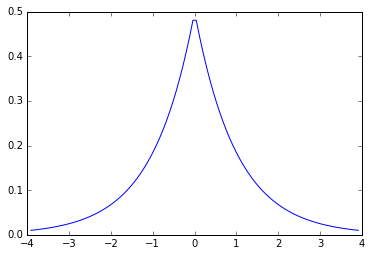

In [10]:
x = np.linspace(laplace.ppf(0.01), laplace.ppf(0.99), 100)
plt.plot(x, laplace.pdf(x), label='laplace pdf')
plt.show()

We will use a nice property of this PDF. See the next plot.

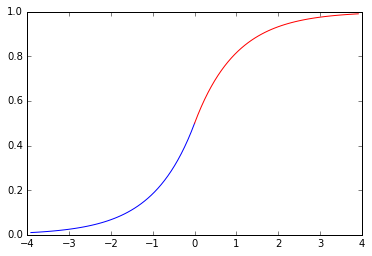

In [11]:
x1 = np.linspace(laplace.ppf(0.01), laplace.ppf(0.5), 50)
plt.plot(x1, laplace.pdf(x1), label='laplace pdf1')
x2 = np.linspace(laplace.ppf(0.5), laplace.ppf(0.99), 50)
plt.plot(x2, 1 - laplace.pdf(x2), 'r-', label='laplace pdf2')
plt.show()

The CDF corresponding to the laplace PDF can be stiched together using the PDF itself but mirroring the second half at $y=0.5$  

This boils down to 
$$
F_X(x)=
\begin{cases}
    \frac{1}{2b} \exp \left( \frac{x-\mu}{b} \right) & \mbox{if }x < \mu \\
    1-\frac{1}{2b} \exp \left( -\frac{x-\mu}{b} \right) & \mbox{if }x \geq \mu
\end{cases}
$$

Going the normal way yields the same result
$$
\begin{align}
F_X(x) = \int_{-\infty}^x p_X(u)\,\mathrm{d}u =\tfrac{1}{2} + \tfrac{1}{2} \text{sgn}(x-\mu) \left(1-\exp \left(-\frac{|x-\mu|}{b} \right ) \right ).
\end{align}
$$

#### 2. Determine the inverse $F^{-1}$

$$
F^{-1}(p) = \mu - b\,\text{sng}(p-0.5)\,\ln(1 - 2|p-0.5|).
$$

<img src="img/Auswahl_2016-05-28_004.png"/>

#### 3. sample uniformly distributed numbers in [0,1]

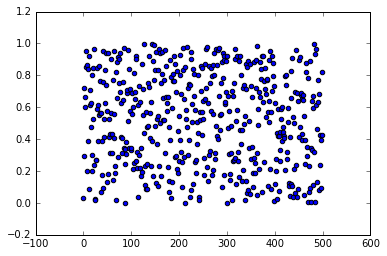

In [65]:
n = 500 # number of samples
z = np.random.uniform(0, 1, size=n)
plt.scatter(range(n), z)
plt.show()

#### 4. get samples $x = F^{-1}(z)$

In [66]:
def sample_laplace(z, mu, b):
    return mu - (b * np.sign(z-0.5) * np.log2(1 - 2*np.absolute(z-0.5)))

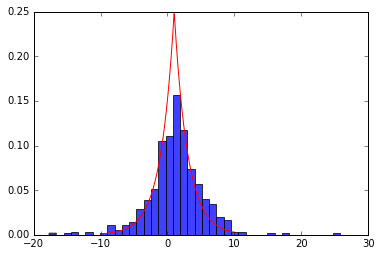

In [67]:
mu = 1
b = 2
x = np.linspace(-10, 10, 500)
X = sample_laplace(z, mu, b)
plt.plot(x,laplace.pdf(x, mu, b), 'r-', label='laplace pdf')
n_bins=40
plt.hist(X, n_bins, normed=True, alpha=0.75)


plt.show()

It seems to have worked quite well!

<img src="img/Auswahl_2016-05-28_005.png"/>

<img src="img/Auswahl_2016-05-28_006.png"/>

<img src="img/Auswahl_2016-05-28_007.png"/>

<img src="img/Auswahl_2016-05-28_008.png"/>